In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
import xgboost as xgb

In [2]:

train_data_path ="./../Data/train/train.csv"
test_data_path = "./../Data/test/test.csv"

dataset = pd.read_csv(train_data_path,skipinitialspace=True)
test_data = pd.read_csv(test_data_path,skipinitialspace=True)


train_dataset = dataset.sample(frac=0.7, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
        
dataset



,ID,Score,col1,col2,col3,col4,col5,col6,col7,col8,...,col3796,col3797,col3798,col3799,col3800,col3801,col3802,col3803,col3804,col3805
0,5,3.475628,0,4.058,0.824,0,10.267,0.728,4.403,0.050,...,1.067,0,0.0,0.115,30.395,24.541,0,0.415,0.997,0
1,8,3.601332,0,4.111,0.929,0,8.352,0.907,4.216,0.034,...,0.934,0,0.0,0.227,38.508,35.038,0,3.979,0.997,3
2,9,1.935003,0,4.139,0.833,66,9.494,0.733,4.069,0.267,...,1.722,0,0.0,0.148,27.932,19.518,0,0.849,0.999,0
3,12,3.283663,0,4.016,0.880,0,8.237,0.836,3.956,0.129,...,0.993,0,0.0,0.124,18.993,25.403,0,0.988,0.998,0
4,14,3.409121,0,4.657,0.522,0,35.882,0.383,4.234,-0.089,...,2.095,0,0.0,0.088,44.225,15.741,0,1.595,0.997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13726,27450,1.897627,0,4.232,0.720,6,14.717,0.767,4.166,0.183,...,1.556,0,0.0,0.111,12.433,17.890,0,1.061,0.997,0
13727,27453,1.567026,0,4.389,0.785,0,21.853,0.667,4.193,0.017,...,1.556,0,0.0,0.125,39.003,21.724,0,1.929,0.998,0
13728,27459,4.008115,0,4.510,0.817,6,25.947,0.688,4.326,0.232,...,2.292,1,0.0,0.081,101.934,31.747,0,2.716,0.998,0
13729,27460,0.255273,0,4.490,0.689,0,25.385,0.497,4.713,0.059,...,2.227,0,0.0,0.079,37.596,19.484,0,-0.248,0.998,0


In [3]:
# describe for Normalization
label = "Score"
train_stats = train_dataset.describe()
train_stats.pop(label)
train_stats = train_stats.transpose()

test_stats = test_dataset.describe()
test_stats.pop(label)
test_stats = test_stats.transpose()

test_data_stats = test_data.describe()
test_data_stats = test_data_stats.transpose()

# pop label
train_labels = train_dataset.pop(label)
test_labels = test_dataset.pop(label)

print(train_labels.shape)

(9612,)


In [4]:
# Normalization
def norm(train_dataset,train_stats):
    return (train_dataset - train_stats["mean"]) / train_stats["std"]

normed_train_data = norm(train_dataset,train_stats)
normed_test_data = norm(test_dataset,test_stats)
# normed_train_data = normed_train_data.dropna(axis=1)
# normed_test_data = normed_test_data.dropna(axis=1)

normed_train_data.fillna(0, inplace=True)
normed_test_data.fillna(0, inplace=True)
normed_test_data = norm(test_data,test_data_stats)
normed_test_data.fillna(0, inplace=True)


print(normed_train_data.shape)

(9612, 3806)


In [5]:
# 必要なライブラリのインポート
from sklearn.model_selection import GridSearchCV
# 動かすパラメータを明示的に表示
# params = {"learning_rate":[0.1,0.3,0.5],
#         "max_depth": [2,3,5,10],
#          "subsample":[0.5,0.8,0.9,1],
#          "colsample_bytree": [0.5,1.0],
#          }
params = {"learning_rate":[0.1,0.3],
        "max_depth": [2,5,10],
         "subsample":[0.5,0.8,1],
         "colsample_bytree": [0.5,1.0],
         }
# モデルにインスタンス生成
mod = xgb.XGBRegressor()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 3, scoring= 'r2', n_jobs =-1,verbose=2)

#　trainデータとtestデータに分割
X_train, X_test, y_train, y_test = train_test_split(normed_train_data, train_labels, test_size = 0.3, random_state = 0)


# 予測モデルを作成
cv.fit(X_train, y_train)

#予測    
y_train_pred = cv.predict(X_train)
y_test_pred = cv.predict(X_test)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 54.4min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 275.5min finished
C:\Users\phamduy\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:29:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [43]:
from sklearn.metrics import r2_score
print("train score {}".format(r2_score(np.array(y_train), y_train_pred)))
print("test score {}".format(r2_score(np.array(y_test), y_test_pred)))
print(cv.best_score_)

train score 0.7967299691501538
test score 0.5311516946305856
0.49862647765733237


In [45]:
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.9}
best score:      0.49863 (+/-0.00408)
{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.9,
 'verbosity': 1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
10,85.693844,2.213753,0.544690,0.020821,0.5,0.1,5,0.9,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.499862,0.493125,0.502894,0.498626,0.004083,1
11,89.449371,0.336864,0.525035,0.016968,0.5,0.1,5,1,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.504106,0.496403,0.492636,0.497716,0.004773,2
58,145.543646,2.261844,0.500049,0.004782,1,0.1,5,0.9,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.513539,0.487369,0.491939,0.497617,0.011414,3
59,145.769618,0.791158,0.524368,0.032047,1,0.1,5,1,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.500517,0.488827,0.501516,0.496953,0.005761,4
15,158.602640,0.338479,0.534363,0.007036,0.5,0.1,10,1,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.508284,0.486019,0.493675,0.495993,0.009237,5
57,147.076597,1.070555,0.504379,0.006795,1,0.1,5,0.8,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.510894,0.480754,0.493752,0.495134,0.012344,6
9,82.670233,0.178284,0.531364,0.031439,0.5,0.1,5,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.502570,0.484507,0.492704,0.493260,0.007385,7
62,280.786699,3.435052,0.502043,0.018619,1,0.1,10,0.9,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.508258,0.481180,0.488980,0.492806,0.011382,8
61,275.020646,1.899389,0.513707,0.017897,1,0.1,10,0.8,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.497063,0.484357,0.492210,0.491210,0.005236,9
13,150.587539,0.506417,0.551686,0.021217,0.5,0.1,10,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.501803,0.478025,0.491433,0.490420,0.009734,10


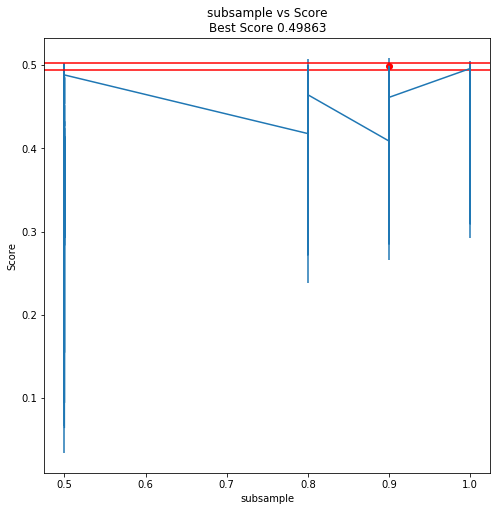

In [51]:
GridSearch_table_plot(cv, "subsample", negative=False)

In [54]:
from sklearn.externals import joblib
joblib.dump(cv.best_estimator_, 'gridsearchCVxgboost.pkl')

C:\Users\phamduy\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['gridsearchCVxgboost.pkl']

In [55]:
# load the model from disk
loaded_model = joblib.load("gridsearchCVxgboost.pkl")
result = loaded_model.predict(normed_test_data)
print(result)

[00:32:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1.3202715 2.6918292 2.5183406 ... 1.9014398 1.9723109 2.7580009]


In [57]:
test_data_predictions = cv.predict(normed_test_data)
test_data_predictions

array([1.3202715, 2.6918292, 2.5183406, ..., 1.9014398, 1.9723109,
       2.7580009], dtype=float32)

In [53]:
import datetime
submit = pd.read_csv("./../Data/sample_submit.csv",header=None)
submit[1] = test_data_predictions
now = datetime.datetime.now()
now_str = '{}_{}_{}_{}_{}'.format(now.year, now.month, now.day, now.hour, now.minute)
submit_file = './../Data/submit/submit_{}.csv'.format(now_str)
submit.to_csv(submit_file,header=None,index=None)